# Descriptive Statistics

Descriptive statistics concerns the description of a dataset. Understanding the dataset statistically will allow a datascientist to build and design better statistical or machine learning models to make prediction.

This notebook will cover a few basic statistical features as well as provide useful code for reference.

In [10]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## The Gaussian Distribution

We will be introducing descriptive stats through the Gaussian distribution. The Gaussian (normal) distribution is a widely used distribution and one of the most analysed probability distributions function. This is due to the concept of the `central limit theorem` which says:

- With a large enough sample, the distribution of the samples will greatly approximate a Gaussian distribution.

Thus, it is very common to assume a Gaussian distribution when you do not have time or means to analyse the exact distribution of your samples or parameter spaces etc.

The Gaussian can be written in the form:
$$f(x) = \frac{1}{(\sigma \sqrt{2π})} e^{-(x - \mu)^2 / (2\sigma^2)}$$

Where $\mu$ and $\sigma$ represents the mean and the standard deviation of the Gaussian distribution. We will cover the mean and standard deviation in the upcoming sections. The standard Gaussian distribtion is written as $X \sim N(0,1)$ which is a zero mean Gaussian with a standard deviation of 1.

This is implemented in the code below:

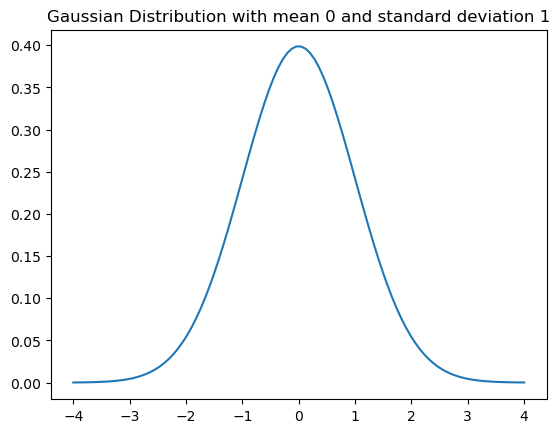

In [2]:
mean = 0
std = 1

x = np.linspace(-4, 4, 100)
y = np.exp(-((x - mean) ** 2 / (2 * std ** 2))) / (std * np.sqrt(2 * np.pi))
plt.plot(x, y)
plt.title(f"Gaussian Distribution with mean {mean} and standard deviation {std}")
plt.show()

We can also sample from a standard Gaussian as follows:

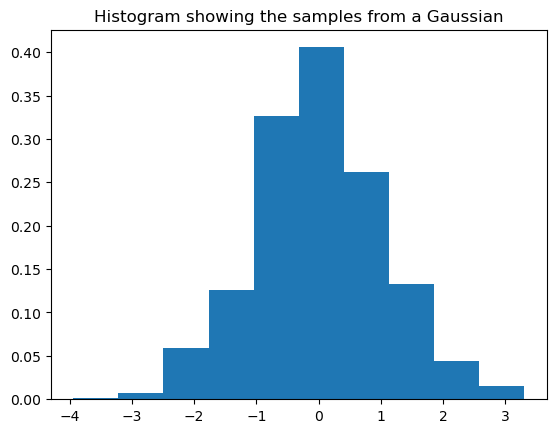

In [3]:
samples = np.random.randn(1000)
plt.hist(samples, density=True)
plt.title("Histogram showing the samples from a Gaussian")
plt.show()

To draw from any Gaussian distribution we first draw samples from the standard Gaussian, then shift it by the mean and scale by the standard deviation:

$$X_{target} = \sigma X_{drawn} + \mu$$

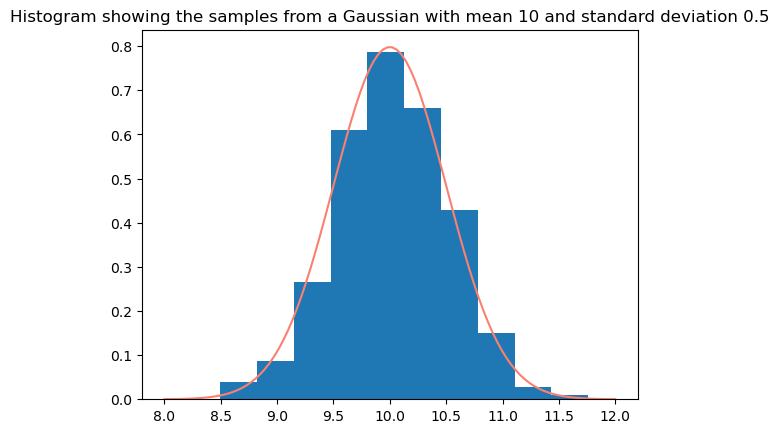

In [4]:
mean = 10
std = 0.5

samples = std * np.random.randn(1000) + mean  # You could also just use np.random.normal(mean, std, 1000)

x = np.linspace(8, 12, 100)
y = np.exp(-((x - mean) ** 2 / (2 * std ** 2))) / (std * np.sqrt(2 * np.pi))
plt.hist(samples, density=True, label="samples")
plt.plot(x, y, color="salmon", label="Actual distibution")
plt.title(f"Histogram showing the samples from a Gaussian with mean {mean} and standard deviation {std}")
plt.show()

# Central Tendency

Central tendencies are measures which aims to find the "middle" point of your samples or distribution. There are 3 metrics:

1. Mean
2. Mode
3. Median

The mean is the average of all the samples. It is calculated via

$$mean = \mu = \frac{\sum_{i=0}^{n}{x_i}}{n}$$

The mode is the value that appear the most frequently.

The median is the middle value when you arrange the samples in order.

$$median = x_{(i + 1)/2}$$

In [22]:
samples = np.array([1,4,6,3,5,7,4,2,3,4,6,6,5,7,6,6,5])
samples = np.sort(samples)

print("Samples:", samples)
print("mean:", np.mean(samples))
print("mode:", np.bincount(samples).argmax())
print("median:", samples[int((len(samples) + 1) / 2)])

Samples: [1 4 6 3 5 7 4 2 3 4 6 6 5 7 6 6 5]
mean: 4.705882352941177
mode: 6
median: 5


## Skewness

Sometimes distributions are not necessary normally distributed and could be "skewed" or piled up to the left or the right. A zero skew is just the Gaussian.

![skewness](./images/skew.webp)

A good measure for the skewness is to use the Pearson's skewness function which could be calculated using the mode or the median.

Using the mode:
$$sk_1 = \frac{\mu - mode}{\sigma}$$

Using the median:
$$sk_2 = \frac{3 (\mu - median)}{\sigma}$$

$sk_1$ uses the mode which is vulnerable to mistakes as the mode could only appear 3 times in a sample size of 1000 etc.

A better metric is to use the Fisher Pearson Coefficient which is calculated as

$$g_1 = \frac{m_3}{m_2^{3/2}}$$

where

$$m_k = \frac{1}{n} \sum_{i=1}^{n}(x_i - \mu)^k$$

In [23]:
mean = np.mean(samples)
mode = np.bincount(samples).argmax()
median = samples[int((len(samples) + 1) / 2)]
std = np.std(samples)

print("sk1:", (mean - mode) / std)
print("sk2:", 3 * (mean - median) / std)

print("g1:", sp.stats.skew(samples))

sk1: -0.773957299203321
sk2: -0.5276981585477186
g1: -0.5867376554941471


## Measure of Dispersion

Central tendencies tells you where the middle of the samples are. However, we also want to know how spread out the values are. To do this we could use a few measures:

1. Range
2. Interquartile Range (IQR)
3. Variance
4. Standard diviation

The range is the difference between the max and min values of the samples. The IQR is the difference between the 75% position and the 25% position of the samples.

In [29]:
print("range:", max(samples) - min(samples))
upper_q = samples[int(3*(len(samples) + 1)/4)]
lower_q = samples[int((len(samples) + 1)/4)]
print("Upper quartile:", upper_q)
print("Lower quartile:", lower_q)
print("IQR:", upper_q - lower_q)

range: 6
Upper quartile: 6
Lower quartile: 4
IQR: 2


The variance of samples is the measure of the deviation from the mean. The standard deviation is the square root of the variance

$$\sigma^2 = var = \frac{\sum{(x-\mu)^2}}{n-1}$$


In [30]:
print("variance:", np.var(samples))
print("std:", np.std(samples))

variance: 2.7958477508650517
std: 1.6720788710061052


## Kurtosis

A very similar but fundamentally different concept to the variance is the kurtosis. This tells you how much the data clusters in the mean and in the tails of the distribution.

It is calculated as

$$K = \frac{1}{n} \sum_{i=1}^{n}(x_i - \mu)^4 $$

![kurtosis](./images/kurtosis.png)

In [36]:
print("kurtosis:", sp.stats.kurtosis(samples))

kurtosis: -0.5215787667875706
